# Regression using KNN and Linear Models (Linear regression , Ridge ,Lasso and Polynomial regression)

##  Importing datasets

<IPython.core.display.Javascript object>


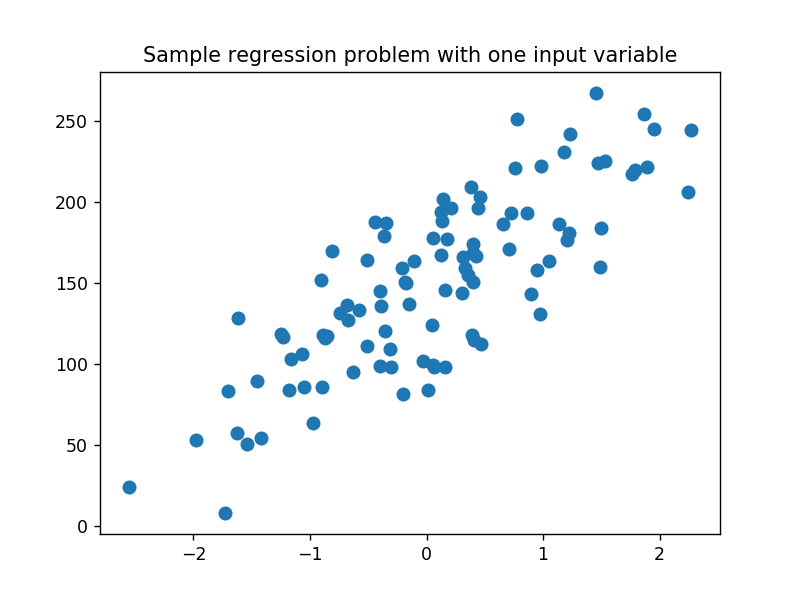

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

# KNN (K-Nearest Neighbors)

### Regression

In [6]:
from sklearn.neighbors import KNeighborsRegressor
x_train,x_test,y_train,y_test=train_test_split(X_R1,y_R1,random_state=0)
knnreg=KNeighborsRegressor(n_neighbors=5).fit(x_train,y_train)
print(knnreg.predict(x_test))
print("squared value error",knnreg.score(x_test,y_test))

[231.70974697 148.35572605 150.58852659 150.58852659  72.14859259
 166.50590948 141.90634426 235.57098756 208.25897836 102.10462746
 191.31852674 134.50044902 228.32181403 148.35572605 159.16911306
 113.46875166 144.03646012 199.23189853 143.19242433 166.50590948
 231.70974697 208.25897836 128.01545355 123.14247619 141.90634426]
squared value error 0.4246800858234563


<IPython.core.display.Javascript object>


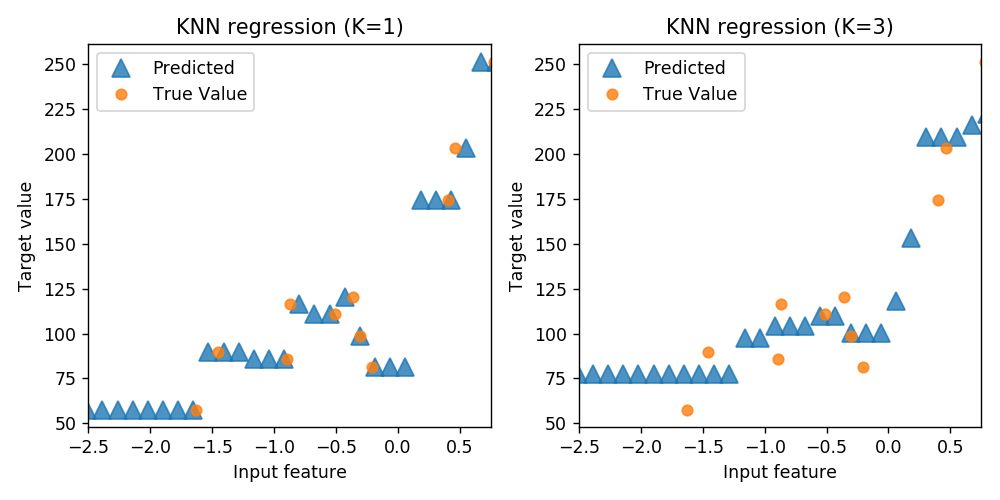

In [12]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


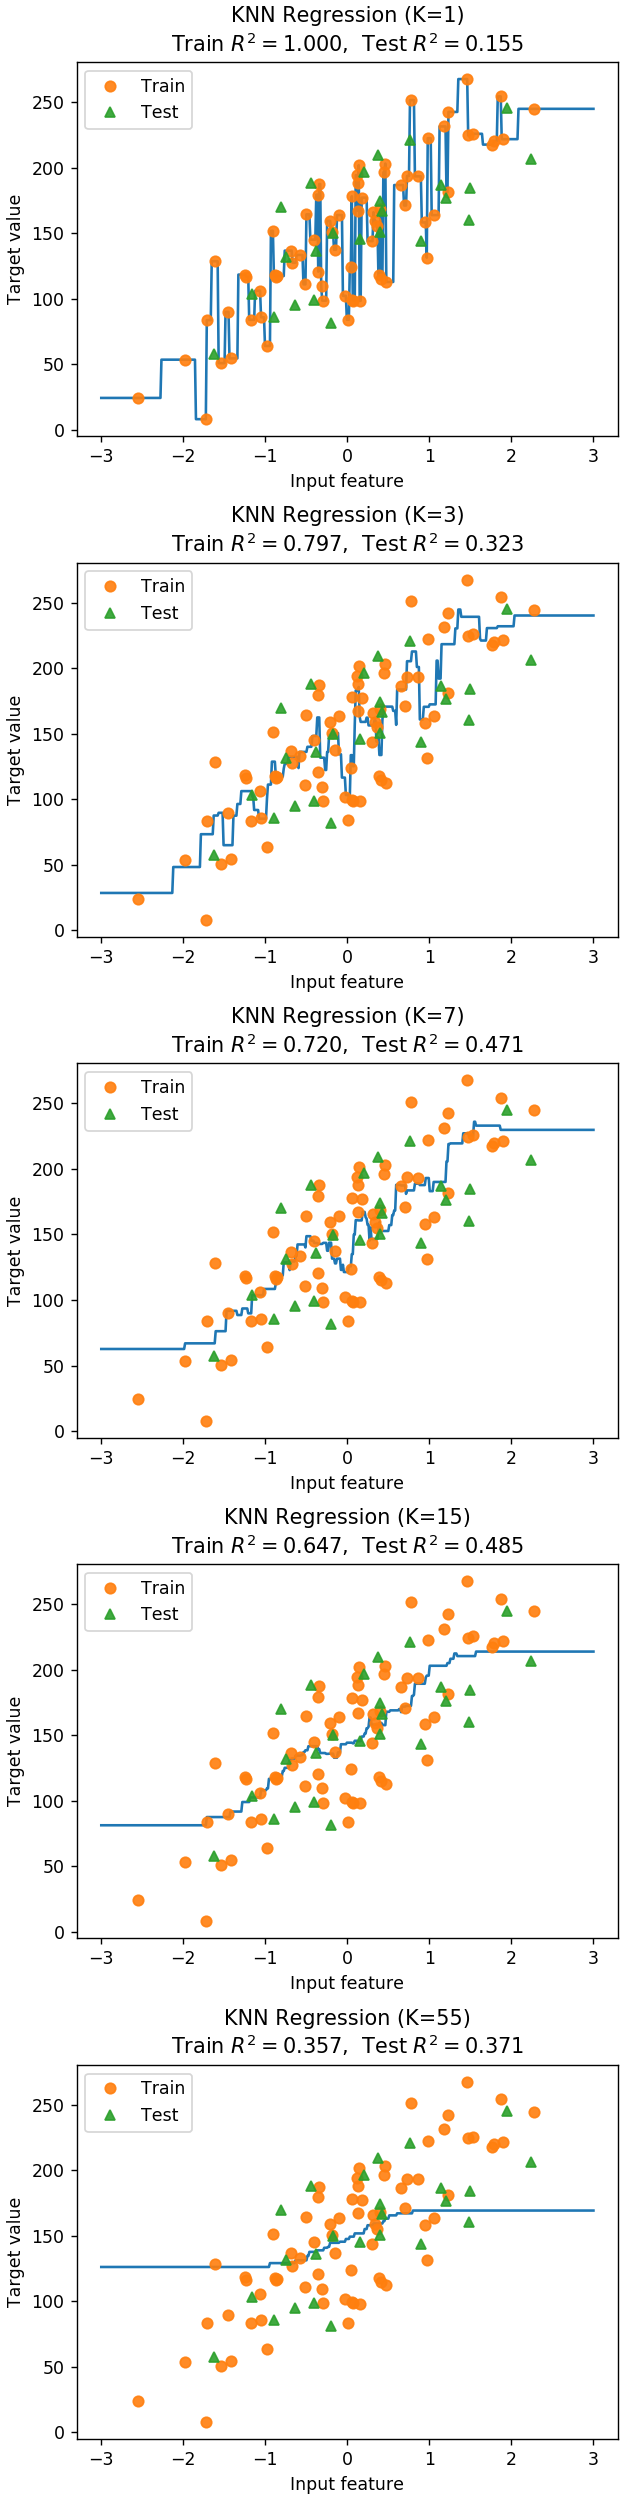

In [11]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


## Linear models for regression

### Linear regression

In [13]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [45.70870465]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


<IPython.core.display.Javascript object>


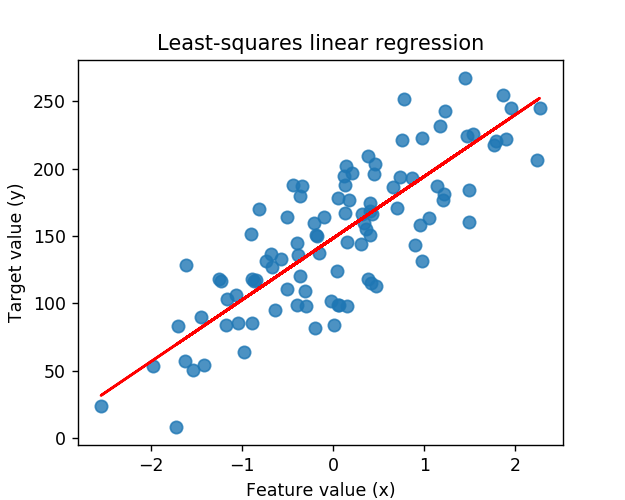

In [14]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [119]:
crime = pd.read_csv('CommViolPredUnnormalizedData.txt', sep=',')
drop=[]
for i in crime.columns:
    if len((crime[i]!="?").unique())>1:
        drop.append(i)
crime.drop(drop,axis=1,inplace=True)
X_crime=crime.iloc[:,4:105]
y_crime=crime["murdPerPop"]
crime.head()

### Ridge regression

In [138]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 62.45735587892183
ridge regression linear model coeff:
[ 5.87931437e-01  5.82718014e-02 -1.91153081e-01 -1.14818758e-01
 -9.92581247e-02  4.85195178e-02 -2.49633767e-01 -1.91796975e-02
 -4.45427674e-03  1.07152309e-05  4.46004454e-03 -3.83066725e-05
 -2.58454826e-01  3.74973933e-02  2.25298159e-02 -1.37520499e-01
  3.01326890e-02 -1.22956158e-01  1.95121073e-05  3.74796890e-04
 -3.44453998e-04 -1.86825109e-05 -1.63661690e-06 -9.61811495e-06
  1.48553900e-05 -6.20545256e-05  9.88989395e-02 -3.05001284e-01
  1.38190237e-01 -6.41732612e-02 -2.31970688e-01  1.35269401e-01
  6.79009008e-02  5.42402966e-02  1.16140971e-02  9.99358396e-02
  4.72187766e-01  1.01201876e-01 -3.11596479e-01 -1.18502510e-01
  8.69196043e-02  1.00505465e-01 -8.40278547e-02 -2.76311974e-02
 -3.57875979e-02  2.52196060e-02 -1.15423897e-01 -6.41277353e-04
  1.15404594e-01 -8.57657439e-05 -6.64988334e-03 -3.16801078e-02
  4.51440724e-02 -1.61751461e-02  8.27827137e

#### Ridge regression with regularization parameter: alpha

In [139]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 11.871516074242956
ridge regression linear model coeff:
[ 0.64819219  8.19453713 -8.29895686 -0.67311161 -1.02187417 -1.04336178
 -1.20243928 -1.14056935 -0.182323    1.38056716  1.21628657 -0.06682544
 -0.79948124 -0.08702219 -0.92661104 -0.6742935   1.1271635  -0.51895874
 -0.4813136   0.41259982  2.11327025 -0.53396719  0.06527493  0.333615
  0.73357752  1.69159253  1.93096057 -0.63265148  0.647857    0.41432844
  0.41886458 -0.09272729  0.57921611  0.05047878 -0.03123704  1.19396588
  2.81054917  0.79763776  0.5620664   1.47997309  1.4700909  -2.27917997
 -3.07137493 -2.52552833 -2.49801806 -0.75230662 -1.66874487  1.78631758
  5.44931779  0.47432539  0.17857127 -0.12790448  0.39537516  0.74614396
  0.5192379   0.19420972 -0.01867219  0.11984583  1.47542538  0.45618812
  2.31857753  1.64908478  0.98174173 -0.15430245  1.06295384  0.47700028
  1.60188907  0.69226448 -0.27975542  2.85028269 -1.51505219  1.14422299
  7.56943119 -0

#### Ridge regression with feature normalization

In [140]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 96, r-squared training: 0.66, r-squared test: 0.49

Alpha = 1.00
num abs(coeff) > 1.0: 75, r-squared training: 0.64, r-squared test: 0.50

Alpha = 10.00
num abs(coeff) > 1.0: 52, r-squared training: 0.60, r-squared test: 0.50

Alpha = 20.00
num abs(coeff) > 1.0: 37, r-squared training: 0.58, r-squared test: 0.49

Alpha = 50.00
num abs(coeff) > 1.0: 28, r-squared training: 0.55, r-squared test: 0.48

Alpha = 100.00
num abs(coeff) > 1.0: 21, r-squared training: 0.51, r-squared test: 0.47

Alpha = 1000.00
num abs(coeff) > 1.0: 3, r-squared training: 0.28, r-squared test: 0.29



### Lasso regression

In [127]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 5.935827814569536
lasso regression linear model coeff:
[ 0.  0. -0. -0.  0.  0.  0.  0.  0.  0.  0. -0. -0. -0. -0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
  0.  0.  0.  0.  0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0. -0.
  0.  0. -0.  0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0.
  0.  0. -0. -0.  0.  0.  0.  0.  0.  0.  0.]
Non-zero features: 0
R-squared score (training): 0.000
R-squared score (test): -0.001

Features with non-zero weight (sorted by absolute magnitude):


#### Lasso regression with regularization parameter: alpha

In [128]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 2, r-squared training: 0.40, r-squared test: 0.39

Alpha = 1.00
Features kept: 1, r-squared training: 0.07, r-squared test: 0.08

Alpha = 2.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 3.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 5.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 10.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 20.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 50.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00



### Polynomial regression

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_crime)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_crime,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_crime,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 1.00463738e+00  4.88451002e-02 -2.00933128e-01 -1.08535901e-01
 -1.01193238e-01  3.43033570e-02 -2.28896717e-01 -3.81090545e-02
  1.80516289e-02  1.12405181e-05  4.06708465e-03 -6.57697633e-05
 -2.75270675e-01  6.99272281e-02  2.59675578e-02 -1.39996261e-01
  1.41137299e-02 -1.26047866e-01  3.18213841e-05  3.86744533e-04
 -3.51058121e-04 -1.75614890e-05 -1.35667971e-06 -9.45159593e-06
  1.74092636e-05 -6.69347515e-05  1.04715989e-01 -3.00325972e-01
  1.39502454e-01 -5.68028152e-02 -2.13552612e-01  1.38601168e-01
  6.60694022e-02  5.28066464e-02  1.16853249e-02  1.03737951e-01
  7.10293857e-01  1.01923701e-01 -1.07902162e-01 -5.40766917e-01
 -1.73326348e+00  9.24054037e-02 -9.65386214e-02 -2.34361798e-02
 -3.42956274e-02  2.89267620e-02 -1.17224761e-01 -6.35642666e-04
  1.06188890e-01 -8.58659445e-05 -1.83847438e-02 -3.76262444e-02
  7.52194304e-02 -3.10015238e-02  1.24425885e+00  4.96480578e-01
 -2.25699441e+00  1.15363014e+00 -2.02277862e-02  4.72112767e-01
 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


(poly deg 2 + ridge) linear model coeff (w):
[ 0.00000000e+00 -1.43178559e-12  5.10190728e-10 ... -4.53755756e-09
 -1.13107296e-09  4.39546453e-08]
(poly deg 2 + ridge) linear model intercept (b): 3.585
(poly deg 2 + ridge) R-squared score (training): 0.891
(poly deg 2 + ridge) R-squared score (test): -24.199
